In [17]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

mat_content = sio.loadmat( 'face(1).mat' )

face_data        = mat_content[ 'X' ]
face_data_labels = mat_content[ 'l' ]

print( 'Face Data {}'.format( face_data.shape ) )
print( 'Face Label {}'.format( face_data_labels.shape ) )

Face Data (2576, 520)
Face Label (1, 520)


# Create a train test split

In [18]:
train_set, test_set, train_label, test_label = train_test_split( face_data.T, face_data_labels.T, test_size = 0.2,
                                                                random_state = 42 )

train_set   = train_set.T
test_set    = test_set.T
train_label = train_label.T 
test_label  = test_label.T

print( 'Train_Set {}'.format( train_set.shape ) )
print( 'Test_Set {}'.format( test_set.shape ) )

print( 'Train_Label {}'.format( train_label.shape ) )
print( 'Test_Label {}'.format( test_label.shape ) )

Train_Set (2576, 416)
Test_Set (2576, 104)
Train_Label (1, 416)
Test_Label (1, 104)


# Work Out Mean Face

Mean Face Shape (2576,)


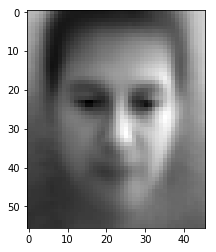

In [19]:
mean_face = np.mean( train_set, axis = 1 )

print( 'Mean Face Shape {}'.format( mean_face.shape ) )
mean_face_img = np.reshape(mean_face,(46,56))
plt.imshow( mean_face_img.T, cmap = 'gist_gray')

# High Dimension

In [20]:
phi_mat = train_set.astype( 'float64' )

for i in range( phi_mat.shape[ 1 ] ):
    phi_mat.T[ i ] = phi_mat.T[ i ] - mean_face # Subtract the mean face from each face
    
print( 'Phi_Mat Shape {}'.format( phi_mat.shape ) )

Phi_Mat Shape (2576, 416)


## Covariance Matrix

In [21]:
A = phi_mat

S = 1 / A.shape[ 1 ] * np.dot( A, A.T )
print( 'Covariance Matrix Shape {}'.format( S.shape ) )

Covariance Matrix Shape (2576, 2576)


## Eigen Values and Vectors

In [22]:
%%time

hd_eig_vals, hd_eig_vecs = np.linalg.eig( S )

CPU times: user 23.6 s, sys: 304 ms, total: 23.9 s
Wall time: 12 s


### Sort Eigenvalues and Vectors into descending

In [23]:
hd_eig_pairs = [ ( np.abs( hd_eig_vals[ i ] ), hd_eig_vecs[ :, i ] ) for i in range( len( hd_eig_vals ) ) ]
hd_eig_pairs.sort( key = lambda x: x[ 0 ], reverse = True )

for i in range( 500 ):
    print( i, hd_eig_pairs[ i ][ 0 ] )

0 925024.7089041442
1 532530.6315193954
2 448877.8466168924
3 263240.39129072166
4 223404.15014935445
5 141717.61246414387
6 132692.99285091058
7 116053.13020208251
8 99239.42387783811
9 81012.5869877316
10 62333.304539364755
11 58557.86112810771
12 52211.26106125647
13 51095.37583350443
14 45635.411439718075
15 42171.85007475326
16 39577.138419967734
17 35338.33108326097
18 33726.46469453218
19 32727.661642764946
20 29464.334880192368
21 26369.83962284394
22 25681.91126235672
23 24494.27292721904
24 22799.51237911536
25 22251.603337679466
26 20953.087892639876
27 19987.70433342372
28 19099.217001246747
29 18584.693459966307
30 17953.99255317551
31 17156.697825758998
32 16956.973025359366
33 15823.73423956549
34 15510.730907366133
35 14306.862624015477
36 13919.936407175637
37 13810.090203959026
38 13162.359075832735
39 12740.846633719899
40 12396.646610435828
41 11679.524416144517
42 11364.190234871408
43 11112.61349964693
44 10859.672753751389
45 10524.413889439304
46 10067.862584866

In [24]:
len( hd_eig_pairs )

2576

In [25]:
M = phi_mat.shape[ 1 ] # Take (Number Of Data Faces) M largest eigenvectors
M_eig_pairs = []

for i in range( M ):
    M_eig_pairs.append( hd_eig_pairs[ i ] )
    
print( 'M Largest Eigen Pairs: {}'.format( len( M_eig_pairs ) ) )

M Largest Eigen Pairs: 416


## Eigen Faces

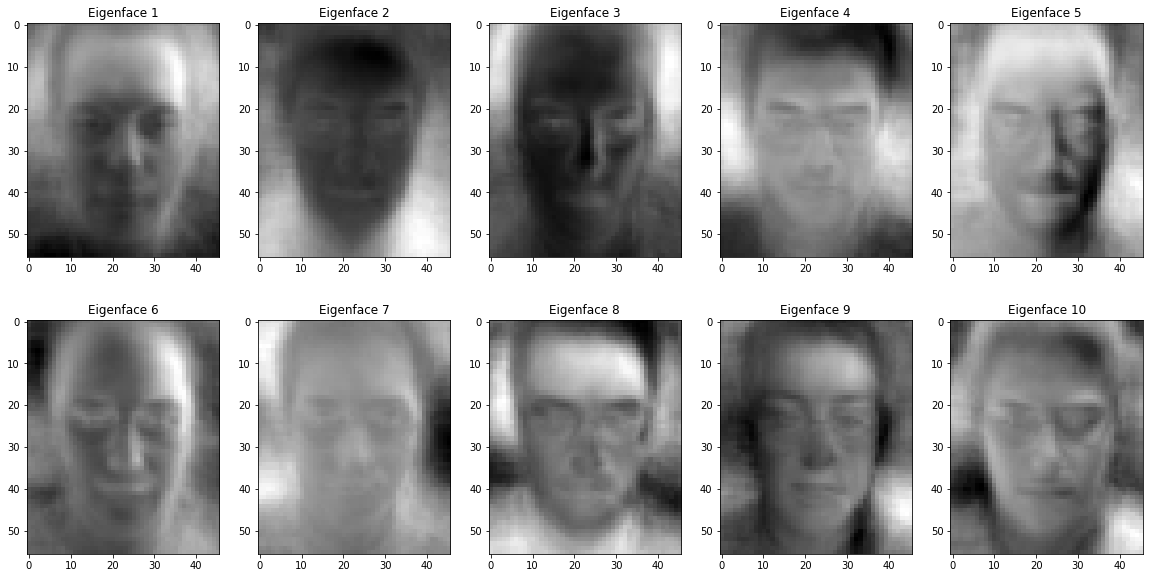

In [26]:
fig = plt.figure( figsize = ( 20, 10 ) )

for i in range( 10 ):
    eigen_vector = M_eig_pairs[ i ][ 1 ]
    eigen_vector = eigen_vector.real # Turn into real number ( remove imaginary part )
    
    img = np.reshape( eigen_vector, ( 46, 56 ) )
    
    a = fig.add_subplot( 2, 5, i+1 )
    a.set_title( 'Eigenface {}'.format( i + 1 ) )
    plt.imshow( img.T, cmap = 'gist_gray' )
    
plt.show()

___

# Low Dimension

In [27]:
print( 'Data - Mean Face, shape: {}'.format( A.shape ) )

Data - Mean Face, shape: (2576, 416)


## Covariance Matrix

In [28]:
S_LD = 1/A.shape[ 1 ] * np.dot( A.T, A )

print( 'Low Dimension Covariance Matrix: {}'.format( S_LD.shape ))

Low Dimension Covariance Matrix: (416, 416)


## Eigen Values and Vectors ( Low Dimension )

In [29]:
%%time

ld_eig_vals, ld_eig_vecs = np.linalg.eig( S_LD )

CPU times: user 282 ms, sys: 7.88 ms, total: 290 ms
Wall time: 153 ms


### Sort Eigenvalues and Vectors into descending

In [30]:
ld_eig_pairs = [ ( np.abs( ld_eig_vals[ i ] ), ld_eig_vecs[ : , i ] ) for i in range( len( ld_eig_vals ) ) ]
ld_eig_pairs.sort( key = lambda x : x[ 0 ], reverse = True )

for i in range( 10 ):
    print( ld_eig_pairs[ i ][ 0 ] )

925024.7089041438
532530.6315193927
448877.84661689255
263240.39129072113
223404.1501493553
141717.61246414448
132692.99285091017
116053.13020208282
99239.42387783817
81012.58698773173


### Create Eigen Pairs in higher dimension

In [31]:
ld_eig_pairs_higher = []

for i in ld_eig_pairs:
    eigen_vector = np.dot( A, i[ 1 ] )
    norm = np.linalg.norm( eigen_vector )
    eigen_vector = eigen_vector / norm
    
    ld_eig_pairs_higher.append( ( i[ 0 ], eigen_vector ) )

In [32]:
print( 'Low Dimension [ 0 ]: {}'.format( ld_eig_pairs_higher[ 0 ][ 1 ] ) )
print( 'High Dimension [ 0 ]: {}'.format( hd_eig_pairs[ 0 ][ 1 ] ) )

Low Dimension [ 0 ]: [-0.01326336 -0.014329   -0.0149903  ...  0.00311901  0.00294199
  0.00324892]
High Dimension [ 0 ]: [ 0.01326336+0.j  0.014329  +0.j  0.0149903 +0.j ... -0.00311901+0.j
 -0.00294199+0.j -0.00324892+0.j]


## Eigen Faces

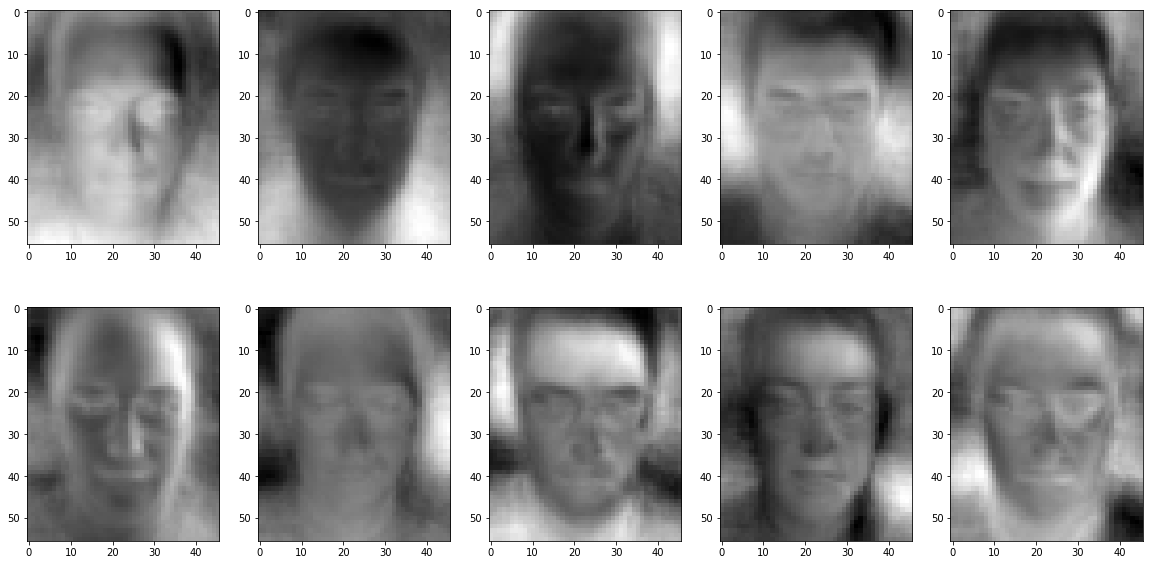

In [33]:
fig = plt.figure( figsize = ( 20, 10 ) )

for i in range( 10 ):
    eigen_vector = ld_eig_pairs_higher[ i ][ 1 ]
    eigen_vector = eigen_vector.real
    
    img = np.reshape( eigen_vector, ( 46, 56 ) )
    
    fig.add_subplot( 2, 5, i + 1 )
    plt.imshow( img.T, cmap = 'gist_gray' )
    
plt.show()

___

# KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [80]:
M_Vectors = 415

# Select eigenvector base to use
KNN_eigen_vectors = np.asarray( [ pair[ 1 ] for pair in ld_eig_pairs_higher ][ : M_Vectors ] )
# KNN_eigen_vectors = np.asarray( [ pair[ 1 ] for pair in hd_eig_pairs ][ : M_Vectors ] )

print( 'KNN_eigen_vectors shape {}'.format( KNN_eigen_vectors.shape ) )

KNN_eigen_vectors shape (415, 2576)


## Create Training Data Subspace

In [81]:
#train_set, test_set, train_label, test_label

X = np.dot( train_set.T, KNN_eigen_vectors.T ) # Project Training Data onto Subspace

print( 'Projected Training Data {}'.format( X.shape ) )

Projected Training Data (416, 415)


## Training Labels

In [82]:
Y = train_label.reshape( train_label.shape[ 1 ], ) # Create 1-D array of Training Labels
print( 'Training Labels {}'.format( Y ) )

Training Labels [44 44 21 34 23 51 33 19 50 36 33 20 34 50 46 51  9 44  8 46  2 43 19 48
  2 40  6 51 35 45 41  3 27  5 51 28 21 29 13 42  4 12 37 30 16  6 22  3
  2 25  7 23 23 10 47 29  3 25 43 38  1 12  5 41  2 49 38  1 28 43  7 12
 33 28  3 29 42  3  1 19 48 11  4 16 49 12 12 43 18 21 37 15 20 39 40 38
 49 24 47 15 41  7 24 17 19 24 40 32 20  9 11 27 15 10 16 36 42 28  9 11
 17 17 20 26  8 47 24 50 12 30 44 46 37 42 25 27 27 32 40 52  4 20 14 39
 44 31 42  6 47 25 12  9 47 27 38 16 40  4 33 20 31 15 41 15 32 30 13 39
 10 15 24 33 10 48 13 19 21 25 32 51 37 32 42 50 13 49 23 52 22 13 44 30
 46 40 41 37 31 30 39 36 12 18 32 43 35 51 38 24 52 33 17 14 20 26 24 12
 13 37 23 45 35 13 29 43 11 39 34 14 38  5 49  7 29  9 25 19 40 16  2  4
  3 18 15 42 36 23 10  6 25 39 36 40 18  5 46 41 21 29 36 26 43  1 26 47
 11 23 45 22 44 18 10 30 22  7  5  4 27 33 21 47  3 41 24 27 38 29 17 40
 45 14  7 14 13 50  1 33 49  7 31  2 16  5 38 48 43 22 41 28 46 45 34 24
 21 22 30 48 26 52 48 31 36 27 21 1

## KNN sklearn

In [83]:
KNN = KNeighborsClassifier(n_neighbors = 1)

KNN.fit( X, Y )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Project Test Data Onto Subspace

In [84]:
X_test = np.dot( test_set.T, KNN_eigen_vectors.T)

Y_test = test_label.reshape( test_label.shape[ 1 ], ) # Create 1-D array of Training Labels


## Predict

In [129]:
%%time

Y_test_predicted = KNN.predict( X_test )

Accuracy = ( np.sum( Y_test_predicted == Y_test ) / Y_test.shape[ 0 ] * 100 )

print( 'Accuracy: {} %'.format( Accuracy ) )

Accuracy: 58.65384615384615 %
CPU times: user 12.9 ms, sys: 22 µs, total: 12.9 ms
Wall time: 17.3 ms


60.57692307692307

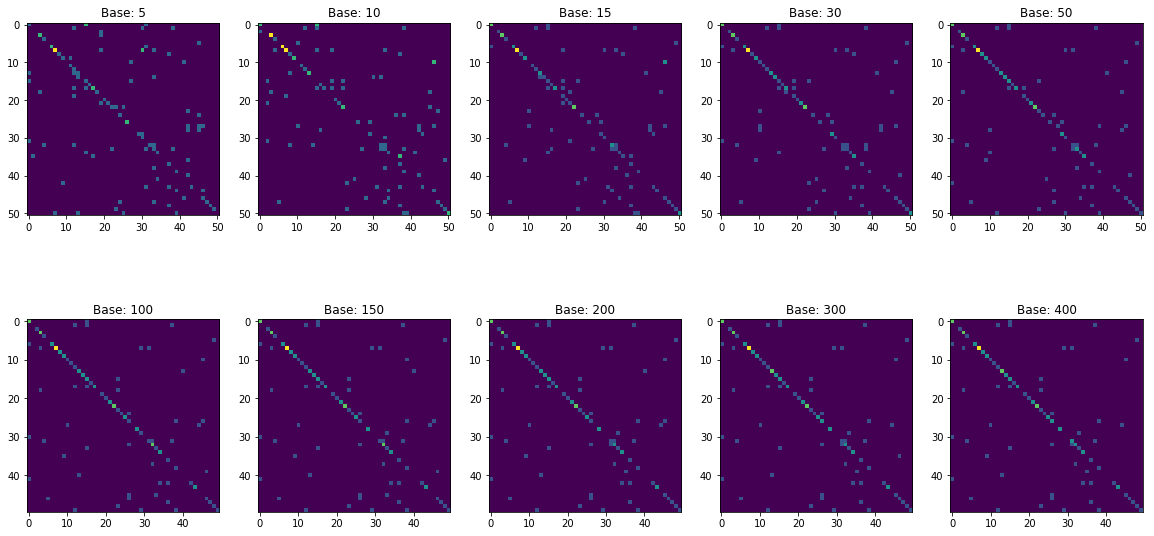

In [130]:
from sklearn.metrics import confusion_matrix

M_Vectors = 400

bases = [ 5, 10, 15, 30, 50, 100, 150, 200, 300, 400 ]
accuracy = []

fig = plt.figure( figsize = ( 20, 10 ) )
count = 0

for base in bases:
    # Select eigenvector base to use
    KNN_eigen_vectors = np.asarray( [ pair[ 1 ] for pair in ld_eig_pairs_higher ][ : base ] )
    X = np.dot( train_set.T, KNN_eigen_vectors.T ) # Project Training Data onto Subspace
    
    X_test = np.dot( test_set.T, KNN_eigen_vectors.T)
        
    KNN.fit( X, Y )
    
    Y_test_predicted = KNN.predict( X_test )    
    
    Accuracy = ( np.sum( Y_test_predicted == Y_test ) / Y_test.shape[ 0 ] * 100 )
    
    accuracy.append(Accuracy)
    
    cm = confusion_matrix( Y_test, Y_test_predicted )    
    
    a = fig.add_subplot( 2, 5, count + 1 )
    count += 1
    a.set_title( 'Base: {}'.format(base))
    
    plt.imshow( cm )
    
    
accuracy[ 9 ]

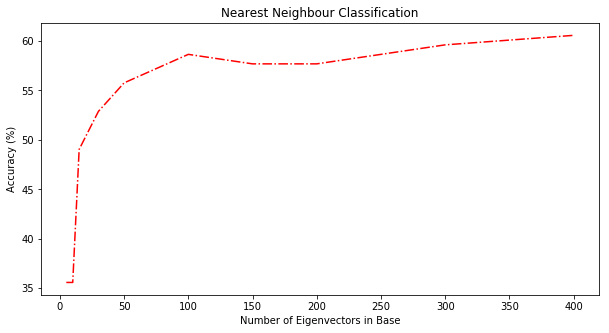

In [69]:
accuracy_fig = plt.figure( figsize = ( 10, 5 ) )

plt.plot( bases, accuracy, 'r-.')
plt.title('Nearest Neighbour Classification')
plt.xlabel('Number of Eigenvectors in Base')
plt.ylabel('Accuracy (%)')
plt.show()

# High Vs Low

* WHen we project the new test set onto the eigen subspace, the direction of the eigenvectors that make up the subspace do not matter. We still obtain the same accuracy

___

# Alternative Method

In [106]:
from sklearn.preprocessing import normalize

number_test_set = 2

M = 2

all_test_set         = []
all_mean_faces       = []
all_higher_subspaces = []

face_data_normalized = normalize( face_data, axis = 0 )

for class_index in range( 1, 53 ):
    
    class_train_set = face_data_normalized.T[ ( class_index - 1 ) * 10 : ( class_index * 10 ) - number_test_set ] # Select first 10 - number_test_set elements
    class_test_set  = face_data_normalized.T[ ( class_index * 10 ) - number_test_set : ( class_index * 10 ) ] # Select last number_test_set elements
    
    for row in class_test_set:
        all_test_set.append( row )
        
        
    # Calculate the class mean face
    class_mean_face = np.mean( class_train_set, axis = 0 )
    
    all_mean_faces.append( class_mean_face )
    
    class_a = class_train_set.astype( 'float64' )
    
    # Subtract mean face from training data
    for i in range( class_a.shape[ 0 ] ):
        class_a[ i ] = class_a[ i ] - class_mean_face
        
    # Calculate covariance matrix
    class_s_ld =  np.dot( class_a, class_a.T ) / class_a.shape[ 0 ]
    
    # Calculate eigenvalues and vectors
    class_ld_eig_vals, class_ld_eig_vecs = np.linalg.eig( class_s_ld )
    
    # Lets use all the eigenvectors since there are only 8 per class
    # Convert to higher dimension
    class_ld_eig_vecs_higher = []

    """
    for vec in class_ld_eig_vecs:
        unnormalized_vector = np.dot( class_a.T, vec )
        norm = np.linalg.norm( unnormalized_vector )        
    """ 
    
    for i in range( M ):
        unnormalized_vector = np.dot( class_a.T, class_ld_eig_vecs[ i ])
        norm = np.linalg.norm( unnormalized_vector )        

        class_ld_eig_vecs_higher.append( unnormalized_vector )
        
    class_ld_eig_vecs_higher = np.asarray( class_ld_eig_vecs_higher ) 
    
    all_higher_subspaces.append( class_ld_eig_vecs_higher )


In [107]:
class_a.shape

(8, 2576)

## Calculated Test, Subspaces and Mean Faces

In [108]:
all_test_set         = np.asarray( all_test_set )
all_higher_subspaces = np.asarray( all_higher_subspaces )
all_mean_faces       = np.asarray( all_mean_faces )

print( 'All Test Set: {}'.format( all_test_set.shape ) )
print( 'All Sub Spaces: {}'.format( all_higher_subspaces.shape ) )
print( 'All Mean Faces: {}'.format( all_mean_faces.shape ) )

All Test Set: (104, 2576)
All Sub Spaces: (52, 2, 2576)
All Mean Faces: (52, 2576)


## Reconstruct a test face and calculate error

In [109]:
from scipy.spatial.distance import euclidean

def reconstruction_error( test_face, class_mean_face, class_subspace ):
    face = test_face - class_mean_face
    projected = np.dot( class_subspace, face )
    
    reconstruction = np.add( class_mean_face.T, np.dot( projected.T, class_subspace ) )
    
    error = euclidean( test_face, reconstruction )
    
    return error, reconstruction

### Test on one image on one subspace

0.5784770270784687


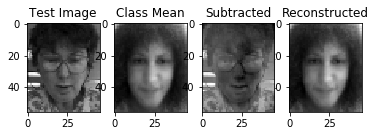

In [110]:
# test_face = face_data.T[ 0 ].reshape( 2576, 1 )
test_face = all_test_set[ 0 ].reshape( 2576, 1 )
test_mean_face = all_mean_faces[ 3 ].reshape( 2576, 1 )
test_subspace = all_higher_subspaces[ 3 ]

error, reconstruction = reconstruction_error( test_face, test_mean_face, test_subspace )

print( error )

test_img = np.reshape( reconstruction,(46,56))

my_fig = plt.figure()

ax1 = my_fig.add_subplot( 1, 4, 4)
ax1.set_title( 'Reconstructed' )
plt.imshow( test_img.T, cmap = 'gist_gray')

ax2 = my_fig.add_subplot( 1, 4, 1 )
ax2.set_title( 'Test Image' )
plt.imshow( test_face.reshape( 46, 56 ).T, cmap = 'gist_gray' )

ax3 = my_fig.add_subplot( 1, 4, 2 )
ax3.set_title( 'Class Mean' )
plt.imshow( test_mean_face.reshape( 46, 56 ).T, cmap = 'gist_gray' )

ax4 = my_fig.add_subplot( 1, 4, 3 )
ax4.set_title( 'Subtracted' )
plt.imshow( ( test_face - test_mean_face ).reshape( 46, 56 ).T, cmap = 'gist_gray' )

plt.show()

## All test images across all subspaces

In [111]:
import sys

all_class_guesses = []
all_class_errors  = []

for image in all_test_set:
# for image in all_test_set[ : 1 ]:
    
    test_image = image.reshape( 2576, 1 )
    
    min_error = sys.float_info.max # Set float to max possible, error will only get smaller ( up to 0 )
    class_guess = -1
    
    class_errors = []
    
    for index in range( len( all_higher_subspaces ) ):
        
        test_subspace  = all_higher_subspaces[ index ]
        test_mean_face = all_mean_faces[ index ].reshape( 2576, 1 )
        
        error, _ = reconstruction_error( test_image, test_mean_face, test_subspace )
        
        class_errors.append( error )
        
        if( error < min_error ):
            min_error = error
            class_guess = index + 1
            
    all_class_guesses.append( class_guess )
    
    all_class_errors.append( class_errors )

In [112]:
all_class_guesses = np.asarray( all_class_guesses )

all_class_guesses

array([ 7,  7,  2,  2,  3,  3,  4,  4,  5,  2,  6,  6,  7,  7,  8,  8,  9,
        9, 10,  7, 30, 47, 12, 10, 12, 13, 22,  2,  2, 15, 19, 21,  7, 17,
       20, 20, 19, 19, 20, 20, 21, 21, 22, 39, 23, 23, 24, 24, 25, 25, 26,
       26, 27, 27, 28, 28, 29, 26, 25, 47, 31, 31, 40, 32, 33, 33, 34, 16,
       35, 35, 16, 28, 37, 37, 38, 38, 39, 39, 40, 40, 41, 26,  7, 42, 42,
       27, 30, 44, 32, 32, 46, 46, 47, 47, 48, 48, 49, 47, 26, 50, 51, 51,
       41, 51])

In [113]:
correct_classes = np.asarray( [ f( i ) for i in range( 52 )  for f in ( lambda x: x+1, lambda x: x+1 ) ]  )

print( correct_classes )

[ 1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10 11 11 12 12
 13 13 14 14 15 15 16 16 17 17 18 18 19 19 20 20 21 21 22 22 23 23 24 24
 25 25 26 26 27 27 28 28 29 29 30 30 31 31 32 32 33 33 34 34 35 35 36 36
 37 37 38 38 39 39 40 40 41 41 42 42 43 43 44 44 45 45 46 46 47 47 48 48
 49 49 50 50 51 51 52 52]


In [114]:
correct_predicted_classes = np.sum( correct_classes == all_class_guesses )

print( "Accuracy: {} %".format( correct_predicted_classes / correct_classes.shape[ 0 ] * 100 ) )

Accuracy: 66.34615384615384 %


Base: 8, Accuracy: 74.03846153846155 %
CPU times: user 1.06 s, sys: 36.1 ms, total: 1.09 s
Wall time: 548 ms


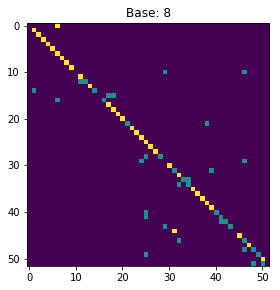

In [127]:
%%time

from sklearn.preprocessing import normalize
import sys


number_test_set = 2

M = 2

face_data_normalized = normalize( face_data, axis = 0 )

# base = [ i for i in range( 1, 9) ]
base = [ 8 ]

accuracies = []

fig = plt.figure( figsize = ( 20, 10 ) )
count = 0


for M in base:
    all_test_set         = []
    all_mean_faces       = []
    all_higher_subspaces = []

    for class_index in range( 1, 53 ):

        class_train_set = face_data_normalized.T[ ( class_index - 1 ) * 10 : ( class_index * 10 ) - number_test_set ] # Select first 10 - number_test_set elements
        class_test_set  = face_data_normalized.T[ ( class_index * 10 ) - number_test_set : ( class_index * 10 ) ] # Select last number_test_set elements

        for row in class_test_set:
            all_test_set.append( row )


        # Calculate the class mean face
        class_mean_face = np.mean( class_train_set, axis = 0 )

        all_mean_faces.append( class_mean_face )

        class_a = class_train_set.astype( 'float64' )

        # Subtract mean face from training data
        for i in range( class_a.shape[ 0 ] ):
            class_a[ i ] = class_a[ i ] - class_mean_face

        # Calculate covariance matrix
        class_s_ld =  np.dot( class_a, class_a.T ) / class_a.shape[ 0 ]

        # Calculate eigenvalues and vectors
        class_ld_eig_vals, class_ld_eig_vecs = np.linalg.eig( class_s_ld )

        # Lets use all the eigenvectors since there are only 8 per class
        # Convert to higher dimension
        class_ld_eig_vecs_higher = []

        """
        for vec in class_ld_eig_vecs:
            unnormalized_vector = np.dot( class_a.T, vec )
            norm = np.linalg.norm( unnormalized_vector )        
        """ 

        for i in range( M ):
            unnormalized_vector = np.dot( class_a.T, class_ld_eig_vecs[ i ])
            norm = np.linalg.norm( unnormalized_vector )        

            class_ld_eig_vecs_higher.append( unnormalized_vector )

        class_ld_eig_vecs_higher = np.asarray( class_ld_eig_vecs_higher ) 

        all_higher_subspaces.append( class_ld_eig_vecs_higher )




    all_class_guesses = []
    all_class_errors  = []

    for image in all_test_set:
    # for image in all_test_set[ : 1 ]:

        test_image = image.reshape( 2576, 1 )

        min_error = sys.float_info.max # Set float to max possible, error will only get smaller ( up to 0 )
        class_guess = -1

        class_errors = []

        for index in range( len( all_higher_subspaces ) ):

            test_subspace  = all_higher_subspaces[ index ]
            test_mean_face = all_mean_faces[ index ].reshape( 2576, 1 )

            error, _ = reconstruction_error( test_image, test_mean_face, test_subspace )

            class_errors.append( error )

            if( error < min_error ):
                min_error = error
                class_guess = index + 1

        all_class_guesses.append( class_guess )

        all_class_errors.append( class_errors )

    all_class_guesses = np.asarray( all_class_guesses )

    correct_classes = np.asarray( [ f( i ) for i in range( 52 )  for f in ( lambda x: x+1, lambda x: x+1 ) ]  )

    correct_predicted_classes = np.sum( correct_classes == all_class_guesses )
    
    accuracies.append( correct_predicted_classes / correct_classes.shape[ 0 ] * 100 )
    
    
    cm = confusion_matrix( correct_classes, all_class_guesses )    
    
    a = fig.add_subplot( 2, 4, count + 1 )
    count += 1
    a.set_title( 'Base: {}'.format(M))
    
    plt.imshow( cm )

    print( "Base: {}, Accuracy: {} %".format( M, correct_predicted_classes / correct_classes.shape[ 0 ] * 100 ) )

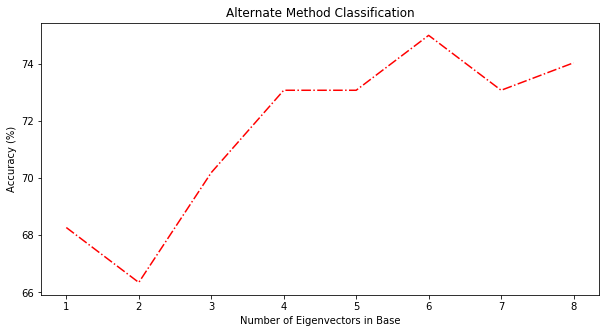

In [124]:
accuracy_fig = plt.figure( figsize = ( 10, 5 ) )

plt.plot( base, accuracies, 'r-.')
plt.title('Alternate Method Classification')
plt.xlabel('Number of Eigenvectors in Base')
plt.ylabel('Accuracy (%)')
plt.show()

In [122]:
len(base)

8